In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

from dbspace.signal.spot_check import spot_check


Using DBSpace LATEST


In [2]:
def stim_plot(ts,Fs):
    plt.figure()
    plt.subplot(211)
    plt.plot(np.linspace(0,ts.shape[0]/Fs,ts.shape[0]),ts)
    
    plt.subplot(212)
    F,Pxx = sig.welch(ts,fs=Fs,nfft=2**15,nperseg=2**10,noverlap=2**10-5)
    plt.plot(F,(Pxx),linewidth=5,label='Sampled')
    #plt.xlim((0,500))
    
    return F

def raw(timeseries):
    stim_plot(timeseries[:,1],Fs=1e6)
    
def decimated(timeseries, factor=100):
    if factor == 1:
        ds_stim = timeseries[0:70000,1]    
    else:
        ds_stim = sig.decimate(timeseries[0:70000,1],q=factor)
        
    print(stim_plot(ds_stim,Fs=1e6/factor))


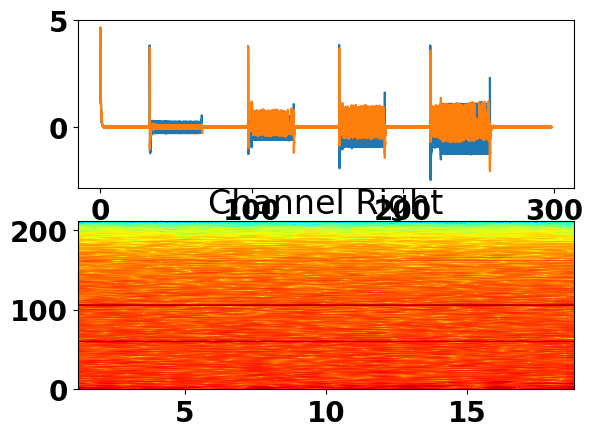

In [4]:
sample_voltage_sweep = '/home/vscode/data/experiments/in_vitr/voltage_sweep.txt'
_ = spot_check(sample_voltage_sweep,plot_sg=True)